In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the csv file
data = pd.read_csv('../Assignment_data/Data_Q1/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [5]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [6]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [7]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

#When the data is NULL replace NULL with median
imputer = Imputer(strategy="median")

In [8]:
#For training data
Y_train = pd.DataFrame(train_set.median_house_value)
imputer.fit(Y_train)
Y = imputer.transform(Y_train)
m = len(Y)

#Forming an array without the columns "median_house_value", "ocean_proximity"
X_train = train_set.drop(["median_house_value", "ocean_proximity"], axis=1)
imputer.fit(X_train)
X_train_new = imputer.transform(X_train)
#Forming the X like [1,X1,X2,....,Xm]
X = np.c_[np.ones((m,1)),X_train_new]
dim = len(X[0])

In [9]:
#For test data
Y_test = pd.DataFrame(test_set.median_house_value)
imputer.fit(Y_test)
test_labels = imputer.transform(Y_test)
m_test = len(test_labels)

#Forming an array without the columns "median_house_value", "ocean_proximity"
X_test = test_set.drop(["median_house_value", "ocean_proximity"], axis=1)
imputer.fit(X_test)
X_test_new = imputer.transform(X_test)
#Forming the X like [1,X1,X2,....,Xm]
test_data = np.c_[np.ones((m_test,1)),X_test_new]

In [10]:
#Finding the co-efficient matrix using ridge regression
#theta : inverse(X.transpose(X) - alpha*A).transpose(X).Y
def ridge_regression(x,y,alpha):
    dim = len(x[0])
    A = np.identity(dim)
    A[0][0] = 0
    theta = np.linalg.pinv(x.transpose().dot(x)+(alpha*A)).dot(x.transpose()).dot(y)
    return theta

In [11]:
#For finding the optimal alpha or lambda

from sklearn.metrics import mean_squared_error

lambda_history = []
rmse_history = []
rmse_opt = float('Inf')
lambda_opt = 0
for i in range(1000):
    theta_new = ridge_regression(X,Y,i)
    testlabel_predictions = np.dot(test_data,theta_new)
    
    lambda_history.append(i)
    
    mse = mean_squared_error(test_labels,testlabel_predictions)
    rmse = np.sqrt(mse)
    rmse_history.append(rmse)
    
    if(rmse_opt>rmse):
        rmse_opt=rmse
        lambda_opt=i
    
    i=i+9

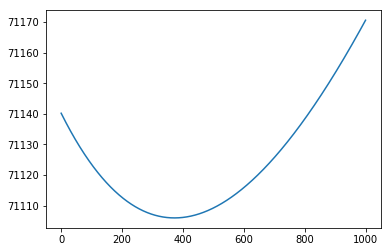

In [12]:
plt.plot(lambda_history, rmse_history)

In [13]:
%%time
#Optimal lambda
print lambda_opt
print rmse_opt
theta_opt = ridge_regression(X,Y,lambda_opt)
print theta_opt

372
71105.94082000348
[[-3.29475364e+06]
 [-3.93196069e+04]
 [-3.93570910e+04]
 [ 1.23538913e+03]
 [-8.44912813e+00]
 [ 1.11346092e+02]
 [-3.86477209e+01]
 [ 5.42026662e+01]
 [ 4.06827180e+04]]
CPU times: user 4.28 ms, sys: 4.17 ms, total: 8.45 ms
Wall time: 2.82 ms


In [14]:
testlabel_opt_predictions = np.dot(test_data,theta_opt)

Now varying alpha to observe the changes in theta and the training times

In [15]:
%%time
#Varying alpha
theta_new1 = ridge_regression(X,Y,10000)
print theta_new1

[[-1.06161548e+06]
 [-1.36391580e+04]
 [-1.57061832e+04]
 [ 1.60167009e+03]
 [-2.25728786e+00]
 [ 2.44264145e+01]
 [-4.35623540e+01]
 [ 1.34492491e+02]
 [ 3.59493512e+04]]
CPU times: user 6.94 ms, sys: 0 ns, total: 6.94 ms
Wall time: 2.03 ms


In [16]:
%%time
#Varying alpha
theta_new2 = ridge_regression(X,Y,0.5)
print theta_new2

[[-3.57780969e+06]
 [-4.26275434e+04]
 [-4.24455420e+04]
 [ 1.18288694e+03]
 [-8.18842763e+00]
 [ 1.16253342e+02]
 [-3.84924096e+01]
 [ 4.63539141e+01]
 [ 4.05386642e+04]]
CPU times: user 5.19 ms, sys: 1.11 ms, total: 6.3 ms
Wall time: 2.03 ms


In [17]:
#Test label predictions
testlabel_predictions1 = np.dot(test_data,theta_new1)
testlabel_predictions2 = np.dot(test_data,theta_new2)

#Respective root mean squared errors
mse1 = mean_squared_error(test_labels,testlabel_predictions1)
print np.sqrt(mse1)

mse2 = mean_squared_error(test_labels,testlabel_predictions2)
print np.sqrt(mse2)

74045.25154326246
71140.07341219911


It is observed that if alpha is very large, the weights tend to get close to zero compared to the case where alpha is comparitively low. As alpha increases, mean squared error in the computation increases.